In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
/kaggle/input/google-play-store-apps/license.txt


In [4]:
data=pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')
data.dropna(how='any',inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


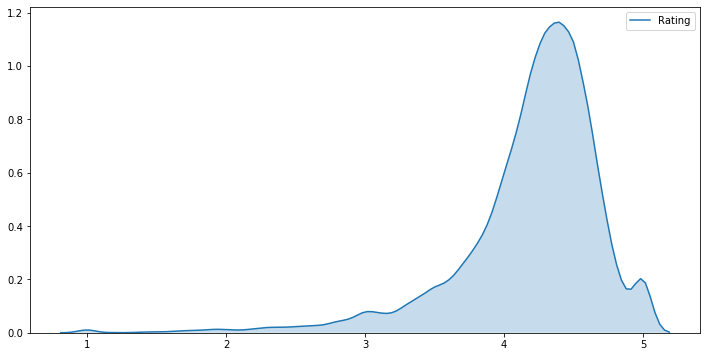

In [5]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=data['Rating'],shade=True)


In [57]:
category=data.groupby('Category')['App'].count()

plt.figure(figsize=(12,6))
sns.countplot(data=data,y='Category')



Category
ART_AND_DESIGN           61
AUTO_AND_VEHICLES        73
BEAUTY                   42
BOOKS_AND_REFERENCE     178
BUSINESS                303
COMICS                   58
COMMUNICATION           328
DATING                  195
EDUCATION               155
ENTERTAINMENT           149
EVENTS                   45
FAMILY                 1746
FINANCE                 323
FOOD_AND_DRINK          109
GAME                   1097
HEALTH_AND_FITNESS      297
HOUSE_AND_HOME           76
LIBRARIES_AND_DEMO       64
LIFESTYLE               314
MAPS_AND_NAVIGATION     124
MEDICAL                 350
NEWS_AND_MAGAZINES      233
PARENTING                50
PERSONALIZATION         312
PHOTOGRAPHY             317
PRODUCTIVITY            351
SHOPPING                238
SOCIAL                  259
SPORTS                  319
TOOLS                   733
TRAVEL_AND_LOCAL        226
VIDEO_PLAYERS           160
WEATHER                  75
Name: App, dtype: int64

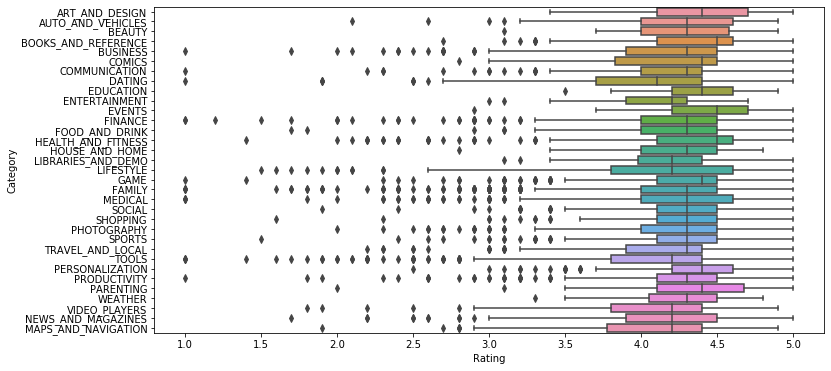

In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,y='Category',x='Rating')

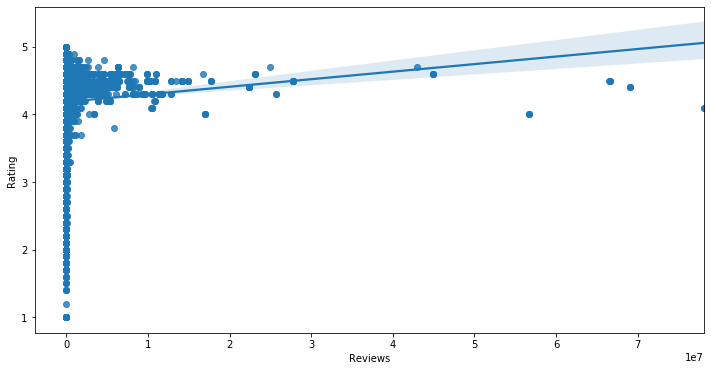

In [95]:
data['Reviews']=data['Reviews'].map(lambda x: int (x))

plt.figure(figsize=(12,6))
sns.regplot(data=data,y='Rating',x='Reviews')

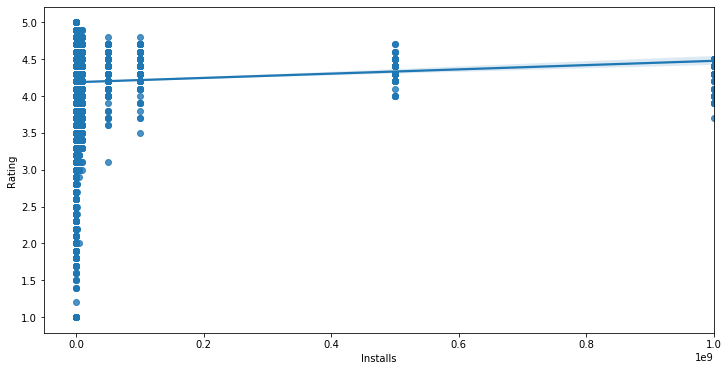

In [101]:
#data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
#data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
#data.Installs = data.Installs.apply(lambda x: int(x))

plt.figure(figsize=(12,6))
sns.regplot(data=data,x='Installs',y='Rating')

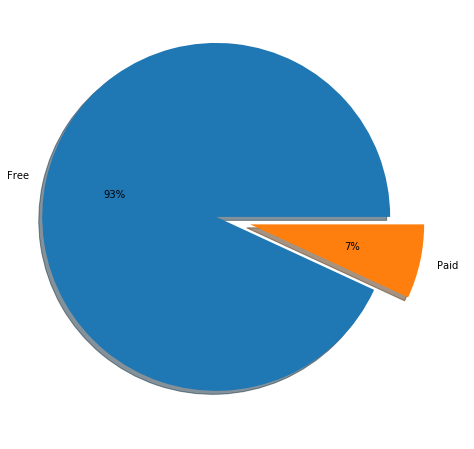

In [120]:
pie=data['Type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(pie, explode=(0.2,0), labels=['Free','Paid'],autopct='%.0f%%', shadow=True)
plt.show()

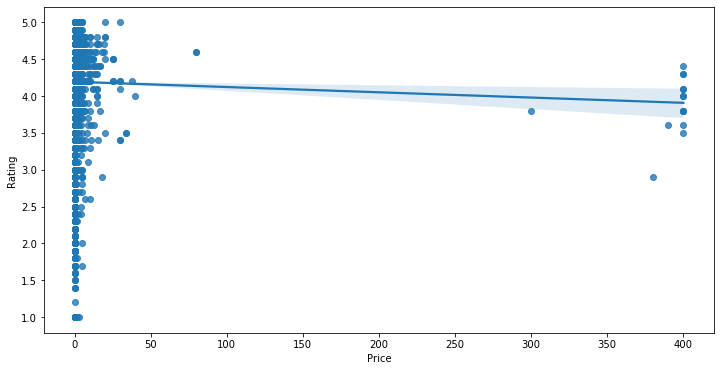

In [129]:
#data['Price']=data['Price'].map(lambda x: x.replace('$',''))
#data['Price']=data['Price'].astype('float')

plt.figure(figsize=(12,6))
sns.regplot(data=data,x='Price',y='Rating')

<Figure size 864x432 with 0 Axes>

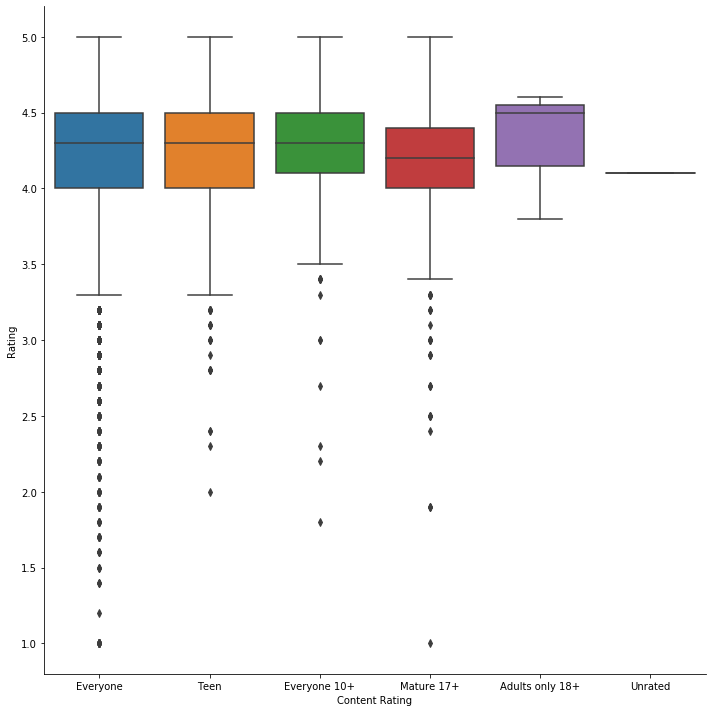

In [136]:
plt.figure(figsize=(12,6))
sns.catplot(data=data,x='Content Rating',y='Rating',kind='box',height=10)

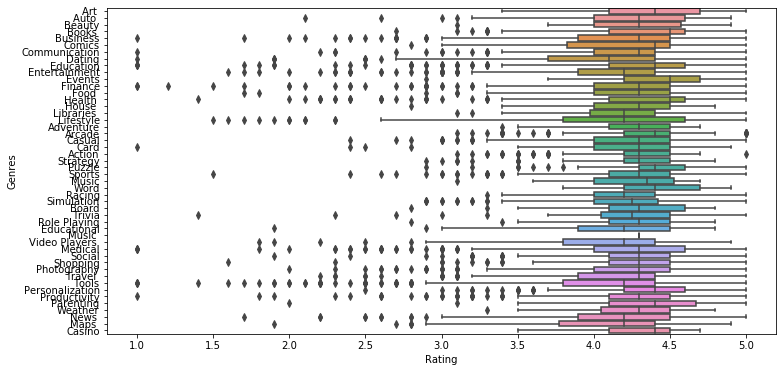

In [159]:
data['Genres']=data['Genres'].map(lambda x: x.split(';')[0])

plt.figure(figsize=(12,6))
sns.boxplot(data=data,y='Genres',x='Rating')

In [177]:
data['new']=pd.to_datetime(data['Last Updated'])
#data['new'].describe()
data['lastupdate']=(data['new']-data['new'].max()).dt.days
data['lastupdate']

0        -213
1        -205
2          -7
3         -61
4         -49
         ... 
10834    -416
10836    -379
10837     -33
10839   -1297
10840     -14
Name: lastupdate, Length: 9360, dtype: int64

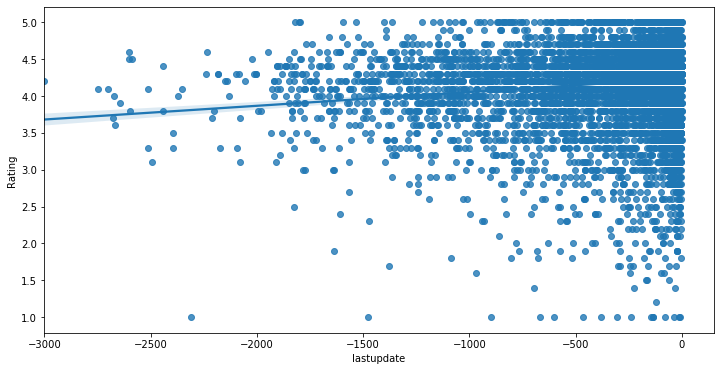

In [179]:
plt.figure(figsize=(12,6))
sns.regplot(data=data,y='lastupdate',x='Rating')